<h2><center>Skin cancer detection by means of AI</center></h2>
<h3><center>Model v0.2</center></h3>

<h4><center>Group 3: Livia Popper, Kyriakos Koukiadakis, Aizhan Shagadatova</center></h4>

This version of the machine learning model made use of data augmentation, with 300 images for each of the seven skin lesion classes.

## Import libraries

In [4]:
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing import image

from random import shuffle

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
from tqdm import tqdm
%matplotlib inline

import glob
import seaborn as sns

In [2]:
from PIL import Image
import PIL.ImageOps
import requests
import io

In [1]:
images_url = "https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/images2/"

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/GroundTruth.csv')
df.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Algorithm implementation

In [10]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1,0,0,0,0,0,0
10011,ISIC_0034317,1,0,0,0,0,0,0
10012,ISIC_0034318,0,0,0,0,1,0,0
10013,ISIC_0034319,0,1,0,0,0,0,0


In [11]:
df.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')

In [12]:
list_mel = []

for i in range(len(df)):
    if df.iloc[i]['MEL'] == 1:
        list_mel.append(df.iloc[i]['image'])

list_mel = list_mel[:300]

In [13]:
list_nv = []

for i in range(len(df)):
    if df.iloc[i]['NV'] == 1:
        list_nv.append(df.iloc[i]['image'])

list_nv = list_nv[:300]

In [14]:
list_bcc = []

for i in range(len(df)):
    if df.iloc[i]['BCC'] == 1:
        list_bcc.append(df.iloc[i]['image'])

list_bcc = list_bcc[:300]

In [15]:
list_akiec = []

for i in range(len(df)):
    if df.iloc[i]['AKIEC'] == 1:
        list_akiec.append(df.iloc[i]['image'])

list_akiec = list_akiec[:300]

In [16]:
list_bkl = []

for i in range(len(df)):
    if df.iloc[i]['BKL'] == 1:
        list_bkl.append(df.iloc[i]['image'])

list_bkl = list_bkl[:300]

In [17]:
list_df = []
for filename in glob.glob('./aug_img2/Images_300/df/*.jpg'):
    list_df.append(filename[25:-4])

for filename in glob.glob('./aug_img2/Images_300/df/*.png'):
    list_df.append(filename[25:-4])

list_df = list_df[:300]

In [18]:
list_vasc = []

for filename in glob.glob('./aug_img2/Images_300/vasc/*.jpg'):
    list_vasc.append(filename[27:-4])

for filename in glob.glob('./aug_img2/Images_300/vasc/*.png'):
    list_vasc.append(filename[27:-4])

list_vasc = list_vasc[:300]

In [19]:
# png_list_df = []

# for filename in glob.glob('./aug_img2/Images_300/df/*.png'):
#     png_list_df.append(filename[25:-4])

# for k in png_list_df:
#     img = Image.open(r'./aug_img2/Images_300/df/' + k + '.png')
#     img.save(r'./aug_img2/Images_300/df_jpg/' + k + '.jpg')

In [20]:
# png_list_vasc = []

# for filename in glob.glob('./aug_img2/Images_300/vasc/*.png'):
#     png_list_vasc.append(filename[27:-4])

# for k in png_list_vasc:
#     img = Image.open(r'./aug_img2/Images_300/vasc/' + k + '.png')
#     img.save(r'./aug_img2/Images_300/vasc_jpg/' + k + '.jpg')

In [21]:
list_all_chosen_images = list_mel[:]
list_all_chosen_images.extend(list_nv)
list_all_chosen_images.extend(list_bcc)
list_all_chosen_images.extend(list_akiec)
list_all_chosen_images.extend(list_bkl)
list_all_chosen_images.extend(list_df)
list_all_chosen_images.extend(list_vasc)

In [22]:
len(list_all_chosen_images)

2100

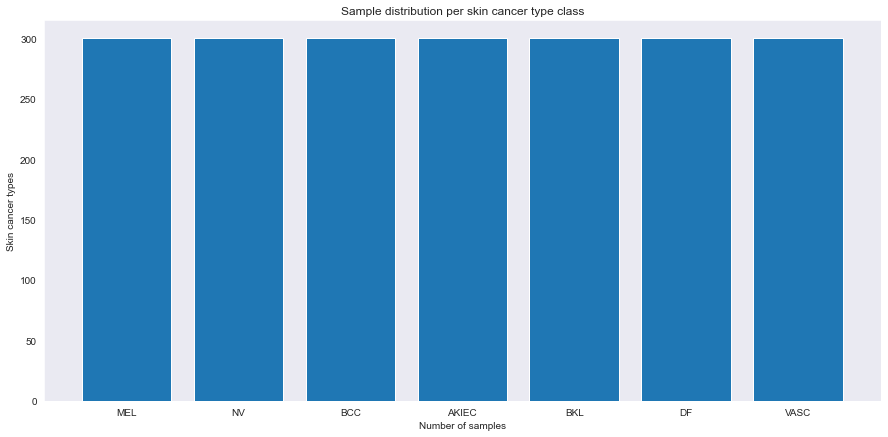

In [23]:
fig = plt.figure(figsize = (15,7))
# ax = fig.add_axes([0,0,1,1])
samples_cols = [len(list_mel), len(list_nv), len(list_bcc), len(list_akiec), len(list_bkl), len(list_df), len(list_vasc)]
plt.bar(cols,samples_cols)
plt.xlabel("Number of samples")
plt.ylabel("Skin cancer types")
plt.title("Sample distribution per skin cancer type class")
plt.grid(False)
plt.show()
# plt.savefig('sample_distribution_per_class_v0.2.png', transparent=True)

In [24]:
balanced_df_2_0 = pd.DataFrame(list_all_chosen_images, columns = ['image'])
balanced_df_2_0

,image
0,ISIC_0024310
1,ISIC_0024313
2,ISIC_0024315
3,ISIC_0024323
4,ISIC_0024333
...,...
2095,_41_9166229
2096,_39_5314420
2097,_36_6636033
2098,_68_5971423


In [25]:
# balanced_df_2_0.to_csv('balanced_df_2_0.csv', index=False)

In [6]:
imported_csv = pd.read_csv('https://raw.githubusercontent.com/liviapopper/skin-cancer-types-data/main/balanced_df_2_1.csv')

In [7]:
imported_csv

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024310,1,0,0,0,0,0,0
1,ISIC_0024313,1,0,0,0,0,0,0
2,ISIC_0024315,1,0,0,0,0,0,0
3,ISIC_0024323,1,0,0,0,0,0,0
4,ISIC_0024333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2095,_41_9166229,0,0,0,0,0,0,1
2096,_39_5314420,0,0,0,0,0,0,1
2097,_36_6636033,0,0,0,0,0,0,1
2098,_68_5971423,0,0,0,0,0,0,1


In [28]:
train_image = []

for i in tqdm(range(imported_csv.shape[0])):
    img = Image.open(io.BytesIO((requests.get(images_url+imported_csv['image'][i]+'.jpg', stream=True)).content))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████| 2100/2100 [00:17<00:00, 116.79it/s]


In [29]:
X.shape

(2100, 450, 600, 3)

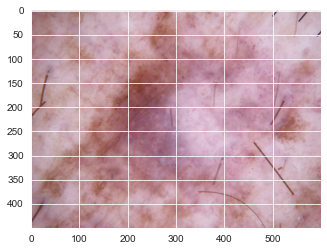

In [30]:
plt.imshow(X[1000])

In [31]:
y = np.array(imported_csv.drop(['image'],axis=1))
y.shape

(2100, 7)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [33]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(450,600,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))

2022-04-30 17:52:34.006261: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 598, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 299, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 297, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 148, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 111, 148, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 146, 64)      1

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
callback = EarlyStopping(monitor='val_loss', patience = 5)

In [37]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=90, callbacks = [callback])

Epoch 1/50
21/21 [==============================] - 167s 7s/step - loss: 2.0387 - accuracy: 0.1339 - val_loss: 1.9454 - val_accuracy: 0.1905
Epoch 2/50
21/21 [==============================] - 158s 7s/step - loss: 1.9159 - accuracy: 0.1889 - val_loss: 1.8592 - val_accuracy: 0.2571
Epoch 3/50
21/21 [==============================] - 151s 7s/step - loss: 1.8330 - accuracy: 0.2534 - val_loss: 1.8043 - val_accuracy: 0.2381
Epoch 4/50
21/21 [==============================] - 133s 6s/step - loss: 1.7506 - accuracy: 0.2693 - val_loss: 1.7438 - val_accuracy: 0.2571
Epoch 5/50
21/21 [==============================] - 132s 6s/step - loss: 1.6987 - accuracy: 0.3090 - val_loss: 1.6713 - val_accuracy: 0.3571
Epoch 6/50
21/21 [==============================] - 130s 6s/step - loss: 1.6319 - accuracy: 0.3730 - val_loss: 1.7837 - val_accuracy: 0.2714
Epoch 7/50
21/21 [==============================] - 131s 6s/step - loss: 1.6291 - accuracy: 0.3460 - val_loss: 1.5913 - val_accuracy: 0.3857
Epoch 8/50
21

In [38]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


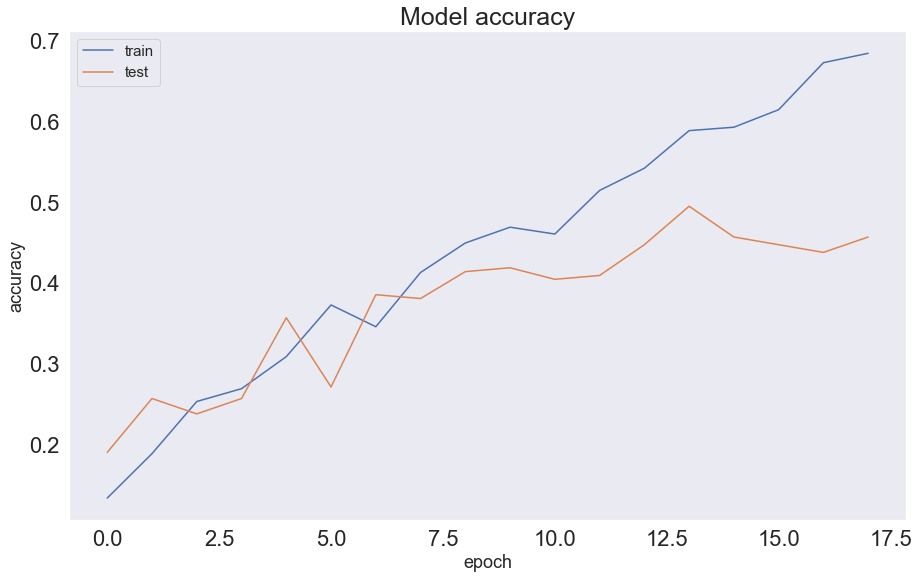

In [57]:
# summarize history for accuracy
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=25)
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_acc_300.png', transparent=True)

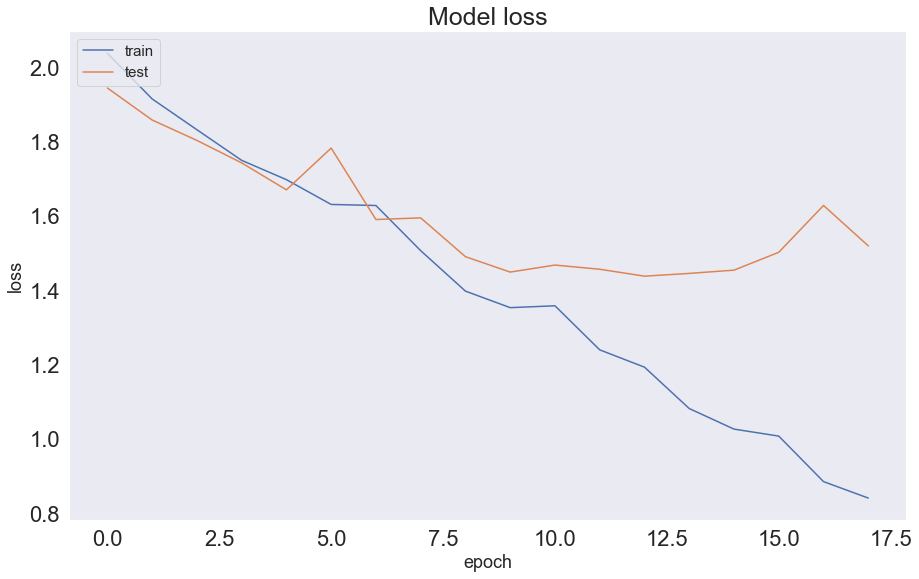

In [59]:
# summarize history for loss
fig = plt.figure(figsize = (15,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=25)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left', fontsize=15)
plt.grid(False)
plt.show()
# plt.savefig('model_loss_300.png', transparent=True)

In [66]:
y_pred = model.predict(X_test)
y_pred

array([[3.2896753e-02, 1.0981133e-01, 1.5230632e-01, ..., 2.5727332e-01,
        1.4245141e-01, 5.1558800e-03],
       [6.3422345e-02, 3.1568114e-02, 3.5033423e-01, ..., 6.8538368e-02,
        8.5031584e-02, 2.5549099e-02],
       [6.7698562e-01, 1.8627405e-01, 3.8043234e-02, ..., 8.2423322e-02,
        9.4492324e-03, 2.9277226e-05],
       ...,
       [7.0963693e-01, 8.4644392e-02, 1.7800663e-02, ..., 4.8905477e-02,
        2.6170451e-02, 6.8753243e-06],
       [1.6865350e-04, 1.2663993e-01, 1.6742144e-02, ..., 7.2650790e-01,
        2.3226854e-03, 1.2761730e-01],
       [2.7133888e-01, 2.3513295e-01, 6.7019045e-02, ..., 5.1540982e-02,
        1.7421182e-02, 7.2649245e-06]], dtype=float32)

In [62]:
y_test

array([3, 3, 0, 4, 2, 6, 3, 1, 4, 5, 5, 4, 1, 6, 5, 2, 1, 5, 0, 6, 4, 1,
       1, 3, 4, 6, 3, 5, 3, 1, 0, 4, 4, 3, 0, 4, 1, 4, 3, 0, 4, 0, 1, 2,
       4, 1, 1, 4, 2, 1, 1, 5, 6, 5, 4, 4, 0, 2, 5, 6, 6, 3, 5, 2, 6, 1,
       3, 6, 2, 0, 0, 1, 1, 1, 0, 5, 0, 1, 6, 4, 0, 0, 2, 3, 5, 5, 5, 4,
       1, 4, 1, 0, 0, 1, 4, 2, 6, 3, 0, 0, 1, 0, 4, 1, 2, 0, 3, 2, 5, 6,
       2, 4, 5, 4, 1, 3, 5, 0, 5, 4, 1, 4, 5, 0, 5, 1, 6, 6, 6, 5, 5, 1,
       3, 0, 4, 3, 1, 0, 6, 1, 1, 5, 2, 2, 3, 3, 3, 4, 6, 6, 0, 0, 1, 5,
       0, 1, 6, 6, 4, 5, 0, 5, 4, 2, 4, 2, 1, 0, 4, 3, 2, 2, 6, 1, 2, 5,
       5, 1, 5, 3, 0, 2, 3, 5, 5, 0, 6, 4, 2, 1, 0, 5, 2, 1, 1, 4, 5, 5,
       6, 6, 6, 6, 1, 3, 2, 0, 3, 4, 6, 0])

In [8]:
# y_pred=np.argmax(y_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

In [69]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21  2  1  2  6  1  0]
 [ 7 18  0  2  7  4  0]
 [ 1  1  4 10  3  3  1]
 [ 3  0  3 12  5  1  0]
 [ 6  1  3  6 14  2  0]
 [ 1  2  6 13  3  7  1]
 [ 0  0  4  0  2  1 20]]


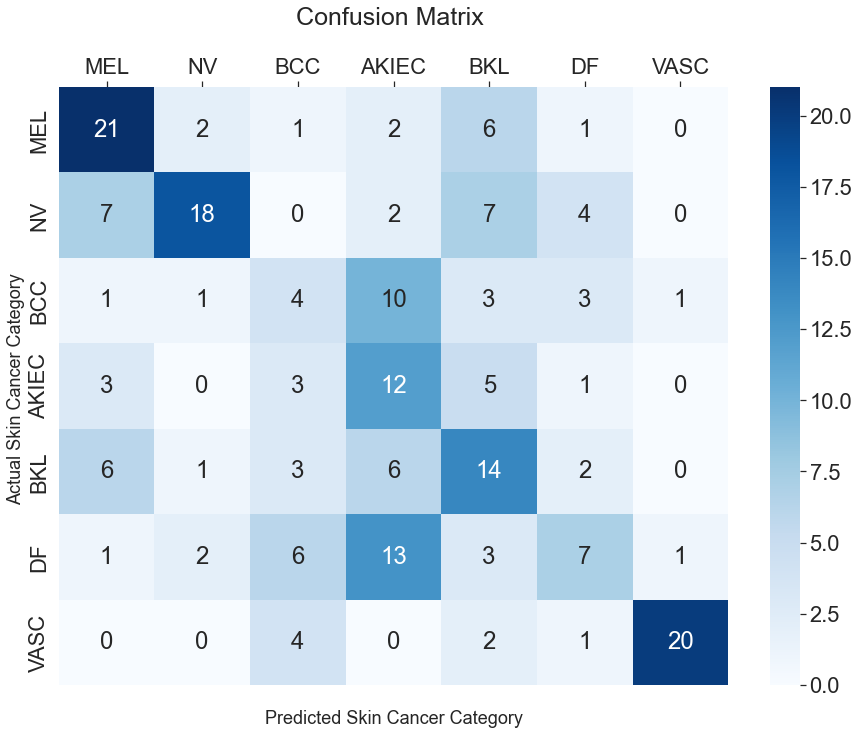

In [70]:
fig = plt.figure(figsize = (15,11))
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
sns.set(font_scale=2.0)
ax.set_title('Confusion Matrix \n', fontsize=25)
ax.set_xlabel('\nPredicted Skin Cancer Category', fontsize=18)
ax.set_ylabel('Actual Skin Cancer Category ', fontsize=18)
ax.xaxis.tick_top()

## Labels
ax.xaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])
ax.yaxis.set_ticklabels(['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
target_names = ['MEL','NV', 'BCC', 'AKIEC','BKL', 'DF', 'VASC']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         MEL       0.54      0.64      0.58        33
          NV       0.75      0.47      0.58        38
         BCC       0.19      0.17      0.18        23
       AKIEC       0.27      0.50      0.35        24
         BKL       0.35      0.44      0.39        32
          DF       0.37      0.21      0.27        33
        VASC       0.91      0.74      0.82        27

    accuracy                           0.46       210
   macro avg       0.48      0.45      0.45       210
weighted avg       0.50      0.46      0.46       210



In [51]:
# Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model')

In [52]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
# model.save('model_v1.0.h5')

#### How to save and reload a model? More info here:
https://www.tensorflow.org/tutorials/keras/save_and_load